<a href="https://colab.research.google.com/github/JP-Garcia/cosc470s24/blob/main/solutions/lab%203/lab3_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kartoone/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 14.43 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/nn


In [2]:
!git clone https://github.com/JP-Garcia/cosc470s24.git
!cp -r cosc470s24/solutions/lab\ 3/images new_images/
!ls new_images

Cloning into 'cosc470s24'...
remote: Enumerating objects: 426, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 426 (delta 57), reused 147 (delta 25), pack-reused 224
Receiving objects: 100% (426/426), 43.82 MiB | 9.48 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Updating files: 100% (171/171), done.
good0.png  good4.png  good8.png   large2.png  large6.png  small0.png  small4.png  small8.png
good1.png  good5.png  good9.png   large3.png  large7.png  small1.png  small5.png  small9.png
good2.png  good6.png  large0.png  large4.png  large8.png  small2.png  small6.png
good3.png  good7.png  large1.png  large5.png  large9.png  small3.png  small7.png


In [3]:
# ***Part 1-Introduce Regularization
from network2 import Network, CrossEntropyCost
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper ()
training_data = list(training_data)
test_data = list(test_data) [0:3]

# Without Regularization
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
weights = net.SGD(training_data, 30, 10, 0.5, evaluation_data=test_data, monitor_evaluation_accuracy=True)

# With Regularization
net2 = Network([784, 30, 10], cost=CrossEntropyCost)
net2.large_weight_initializer()
weights2 = net2.SGD(training_data, 30, 10, 0.5, lmbda=0.1, evaluation_data=test_data, monitor_evaluation_accuracy=True)



Epoch 0 training complete
Appending weights for epoch 0
Accuracy on evaluation data: 2 / 3
Epoch 1 training complete
Appending weights for epoch 1
Accuracy on evaluation data: 3 / 3
Epoch 2 training complete
Appending weights for epoch 2
Accuracy on evaluation data: 3 / 3
Epoch 3 training complete
Appending weights for epoch 3
Accuracy on evaluation data: 3 / 3
Epoch 4 training complete
Appending weights for epoch 4
Accuracy on evaluation data: 3 / 3
Epoch 5 training complete
Appending weights for epoch 5
Accuracy on evaluation data: 3 / 3
Epoch 6 training complete
Appending weights for epoch 6
Accuracy on evaluation data: 3 / 3
Epoch 7 training complete
Appending weights for epoch 7
Accuracy on evaluation data: 3 / 3
Epoch 8 training complete
Appending weights for epoch 8
Accuracy on evaluation data: 3 / 3
Epoch 9 training complete
Appending weights for epoch 9
Accuracy on evaluation data: 3 / 3
Epoch 10 training complete
Appending weights for epoch 10
Accuracy on evaluation data: 3 /

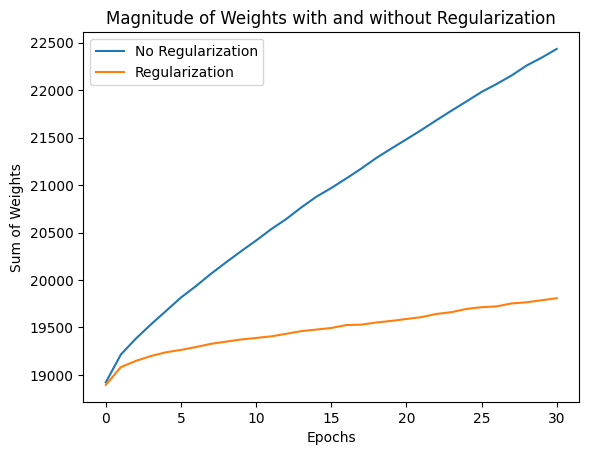

In [4]:
# Plot the magnitude of the sum of weights after each epoch
import matplotlib.pyplot as plt

def getweightsum(epoch_weights):
  total_weights = []
  # Gets the weights for each epoch for first network
  for epoch_weight in epoch_weights:
    # Add the manitude of each weight for first layer
    l1mag = 0
    for l1 in epoch_weight[0]:
      for l1weight in l1:
        l1mag += abs(l1weight)

    # Add the manitude of each weight for second layer
    l2mag = 0
    for l2 in epoch_weight[1]:
      for l2weight in l2:
        l2mag += abs(l2weight)

    total_weights.append(l1mag + l2mag)

  return total_weights

epoch_weights = weights[4]
epoch_weights2 = weights2[4]
no_reg_weights = getweightsum(epoch_weights)
reg_weights = getweightsum(epoch_weights2)


plt.plot(no_reg_weights, label="No Regularization")
plt.plot(reg_weights, label="Regularization")
plt.title('Magnitude of Weights with and without Regularization')
plt.ylabel('Sum of Weights')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

Testing good images:
Numbers correctly identified: 0 2 3 4 8 
Numbers incorrectly identified: 1 5 6 7 9 

Testing large images:
Numbers correctly identified: 4 
Numbers incorrectly identified: 0 1 2 3 5 6 7 8 9 

Testing small images:
Numbers correctly identified: 2 4 6 7 
Numbers incorrectly identified: 0 1 3 5 8 9 



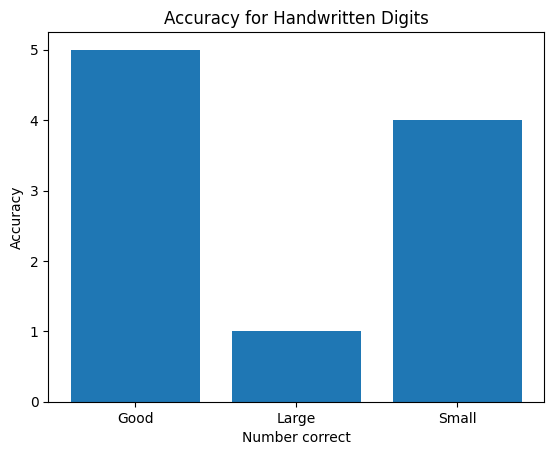

In [5]:
# ***Part 2 - Normalization and Handwritten Digits***
from PIL import Image

# Function to test how many images of a category the network gets correct
def testing(fileprefix):
  base_path = 'new_images/'
  accuracy = [0] * 10
  print(f'Testing {fileprefix} images:')
  correct_str = 'Numbers correctly identified: '
  incorrect_str = 'Numbers incorrectly identified: '
  for i in range(10):
    image_path = base_path + fileprefix + str(i) + '.png'
    image = Image.open(image_path)

    # Convert the image to a numpy array
    image_array = np.array(image)/255.0

    # Test image
    result = np.argmax(net2.feedforward(np.reshape(image_array, (784,1))))
    if result == i:
      accuracy[i] = 1
      correct_str += str(i) + ' '
    else:
      incorrect_str += str(i) + ' '
  print(correct_str)
  print(incorrect_str)
  print()
  return accuracy

# Test how many the network gets correct
# Accuracy will be stored in 3 arrays
good_accuracy = testing('good')
large_accuracy = testing('large')
small_accuracy = testing('small')

# Chart the accuracy for each
x = np.array(['Good','Large','Small'])
y = np.array([sum(good_accuracy), sum(large_accuracy), sum(small_accuracy)])
plt.bar(x,y)
plt.title('Accuracy for Handwritten Digits')
plt.ylabel('Accuracy')
plt.xlabel('Number correct')
plt.show()

In [ ]:
# ***Part 3 - Increased number of training images
# Expand the number of images
import expand_mnist
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper("mnist_expanded.pkl.gz")
training_data=list(training_data)
test_data = list(test_data)
print(len(training_data))

Expanding the MNIST training set
Expanding image number 1000
Expanding image number 2000
Expanding image number 3000
Expanding image number 4000
Expanding image number 5000
Expanding image number 6000
Expanding image number 7000
Expanding image number 8000
Expanding image number 9000
Expanding image number 10000
Expanding image number 11000
Expanding image number 12000
Expanding image number 13000
Expanding image number 14000
Expanding image number 15000
Expanding image number 16000
Expanding image number 17000
Expanding image number 18000
Expanding image number 19000
Expanding image number 20000
Expanding image number 21000
Expanding image number 22000
Expanding image number 23000
Expanding image number 24000
Expanding image number 25000
Expanding image number 26000
Expanding image number 27000
Expanding image number 28000
Expanding image number 29000
Expanding image number 30000
Expanding image number 31000
Expanding image number 32000
Expanding image number 33000
Expanding image num

In [ ]:
# Retrain the network
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
weights = net.SGD(training_data, 30, 10, 0.5, lmbda=0.1, evaluation_data=test_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Appending weights for epoch 0
Accuracy on evaluation data: 9413 / 10000
Epoch 1 training complete
Appending weights for epoch 1
Accuracy on evaluation data: 9556 / 10000
Epoch 2 training complete
Appending weights for epoch 2
Accuracy on evaluation data: 9550 / 10000
Epoch 3 training complete
Appending weights for epoch 3
Accuracy on evaluation data: 9590 / 10000
Epoch 4 training complete
Appending weights for epoch 4
Accuracy on evaluation data: 9594 / 10000
Epoch 5 training complete
Appending weights for epoch 5
Accuracy on evaluation data: 9560 / 10000
Epoch 6 training complete
Appending weights for epoch 6
Accuracy on evaluation data: 9627 / 10000
Epoch 7 training complete
Appending weights for epoch 7
Accuracy on evaluation data: 9599 / 10000
Epoch 8 training complete
Appending weights for epoch 8
Accuracy on evaluation data: 9604 / 10000
Epoch 9 training complete
Appending weights for epoch 9
Accuracy on evaluation data: 9607 / 10000
Epoch 10 training co

Testing good images:
Numbers correctly identified: 0 2 3 4 5 7 8 9 
Numbers incorrectly identified: 1 6 

Testing large images:
Numbers correctly identified: 3 7 8 
Numbers incorrectly identified: 0 1 2 4 5 6 9 

Testing small images:
Numbers correctly identified: 9 
Numbers incorrectly identified: 0 1 2 3 4 5 6 7 8 



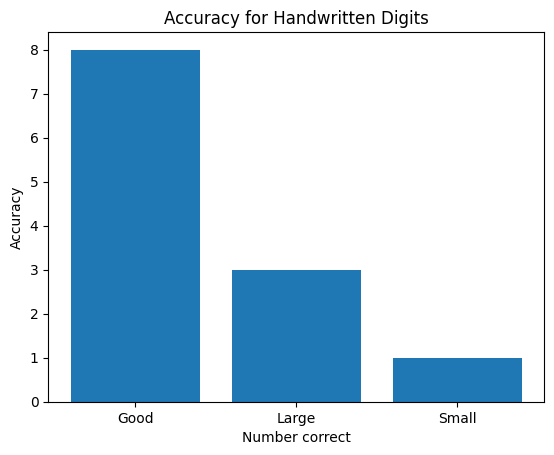

In [ ]:
# Function to test how many images of a category the network gets correct
def testing(fileprefix):
  base_path = 'new_images/'
  accuracy = [0] * 10
  print(f'Testing {fileprefix} images:')
  correct_str = 'Numbers correctly identified: '
  incorrect_str = 'Numbers incorrectly identified: '
  for i in range(10):
    image_path = base_path + fileprefix + str(i) + '.png'
    image = Image.open(image_path)

    # Convert the image to a numpy array
    image_array = np.array(image)/255.0

    # Test image
    result = np.argmax(net.feedforward(np.reshape(image_array, (784,1))))
    if result == i:
      accuracy[i] = 1
      correct_str += str(i) + ' '
    else:
      incorrect_str += str(i) + ' '
  print(correct_str)
  print(incorrect_str)
  print()
  return accuracy

# Test how many the network gets correct
# Accuracy will be stored in 3 arrays
good_accuracy = testing('good')
large_accuracy = testing('large')
small_accuracy = testing('small')

# Chart the accuracy for each
x = np.array(['Good','Large','Small'])
y = np.array([sum(good_accuracy), sum(large_accuracy), sum(small_accuracy)])
plt.bar(x,y)
plt.title('Accuracy for Handwritten Digits')
plt.ylabel('Accuracy')
plt.xlabel('Number correct')
plt.show()